<a href="https://colab.research.google.com/github/victoriamaina/Implementing-KNN-and-Naives-Bayes-Classifier/blob/main/implementing_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **implementing  KNN Classifier.**

By
 Victoria Maina



## **1. Defining the Question**

### a) Specifying the Question

The research problem is to implement a K-nearest neighbor (kNN) classifier. And futher calculate the resulting metrics



### b) Defining the Metric for Success

 This project will be successful when:
 
  1))The model achieves atleast 80% accuracy


### c) Understanding the context 

> We requires us to implement a K-nearest neighbor (kNN) classifier. Once we conduct the experiments, and further calculate the resulting metric




### d) Recording the Experimental Design

> The following steps were taken:

Business Understanding

Reading the data

Checking our data

Data cleaning

Performing EDA

KNN Classifier

Challenging the solution

Conclusion

### e) Data Relevance

Datasets Provided:

train and test dataset [Link](https://archive.org/download/train5_202002/train%20%285%29.csv)
[Link](https://archive.org/download/test1_202002/test%20%281%29.csv)

## **2. Reading the Data**

In [1]:
# Importing the libraries we will need 

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats

from scipy import stats

### Reading the Dataset from our CSV file

In [2]:
#loading the dataset
test=pd.read_csv("/content/test (1).csv")
#previewing the dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#checking the tail
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## **3. Data Understanding**

In [4]:
#getting the info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Our dataset comprises of Float,object and integer data types.

In [5]:
#checking the columns
#
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We have 11 columns as shown above.

In [6]:
#Getting the shape
#
test.shape

(418, 11)



There are 418 records and 11 variables.

In [7]:
#getting basic statistical details
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The count,mean,std,min,max and quartiles are shown above.

In [8]:
#getting the number unique values in each column
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

These are the number of unique values in each column.

In [9]:
#checking for missing values
test.isnull().sum().sum()

414

There are 414 missing values.

## **4. Data Cleaning**

> This done by following the data integrity rules i.e Validity, Accuracy, Completeness, Consistency, Uniformity to ensure the data is ready for analysis

### 4.1 Completeness

In [10]:
#checking for null values across each column
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

the dataset has no null values.

In [11]:
#Checking for the percentage of the missing values
test.isna().mean().round(4) * 100

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

### 4.2 Validity

In [12]:
# Replacing spaces in the column names with underscore
test.columns= test.columns.str.replace(" ", "_")

To make our columns look neater.

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# Changing column names to lower case
test.columns= test.columns.str.lower()


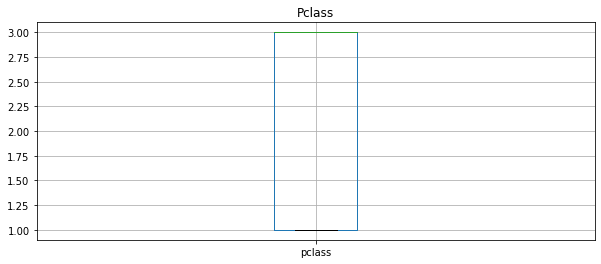

In [15]:
#checking outliers
plt.figure(figsize=(10, 4))
test.boxplot(['pclass'])
plt.title('Pclass')
plt.show()

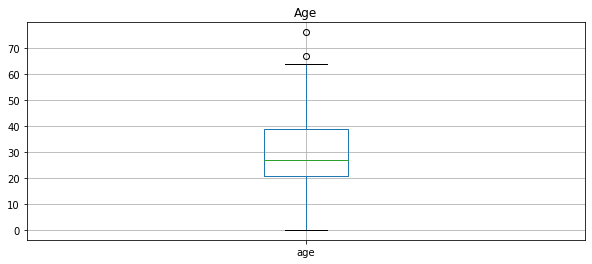

In [16]:
#checking outliers
plt.figure(figsize=(10, 4))
test.boxplot(['age'])
plt.title('Age')
plt.show()

There are existing outliers but they won't be dropped as they are true values to the data,i.e, represent real time data.

### 4.3 Consistency

In [17]:
#checking for duplicates
test.duplicated().sum()

0

There are 0 duplicates.

In [18]:
#Irrelevant Data
#Drop columns we do not need.
#

test=test.drop(['cabin','ticket','passengerid','name'], axis = 1)
test

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


The columns which aren't necessary for our analysis are dropped.

In [19]:
test.isnull().sum()

pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [20]:
test=test.dropna(axis=0, how='all')
test=test.dropna(axis=1, how='all')
test.isnull().sum()

pclass       0
sex          0
age         86
sibsp        0
parch        0
fare         1
embarked     0
dtype: int64

In [21]:
#interpolate missing values of column age
test['age']=test['age'].interpolate()
test.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

### 4.4 Uniformity

In [22]:
#no action was done

### 4.5 Accuracy

In [23]:
#no action was done

## **5. Exploratory Data Analysis**

### Univariate Analysis

#### Measures of central Tendacies

In [24]:
from numpy.ma.core import append
numerical_columns=['pclass','age','sibsp','fare']
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: '+ str(test[column].mean()))
  print(column + ', Mode:' + str(test[column].mode()))
  print(column + ', Median: ' + str(test[column].median()))



pclass, Mean: 2.2655502392344498
pclass, Mode:0    3
dtype: int64
pclass, Median: 3.0


age, Mean: 30.045251196172252
age, Mode:0    24.0
dtype: float64
age, Median: 27.7


sibsp, Mean: 0.4473684210526316
sibsp, Mode:0    0
dtype: int64
sibsp, Median: 0.0


fare, Mean: 35.6271884892086
fare, Mode:0    7.75
dtype: float64
fare, Median: 14.4542


above is the mean ,median and mode of fare,sibsp,age and pclass

#### Measures of dispersion

In [25]:
numerical_columns=['pclass','age','sibsp','fare']
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(test[column].std()))
  print(column + ', Variance: ' + str(test[column].var()))
  print(column + ', Skewness: ' + str(test[column].skew()))
  print(column + ', Kurtosis: ' + str(test[column].kurt()))
  print(column + ', Quartiles: ' + str(test[column].quantile([0.25,0.5,0.75])))



pclass, Standard deviation: 0.8418375519640519
pclass, Variance: 0.7086904638968277
pclass, Skewness: -0.5341703482345055
pclass, Kurtosis: -1.3826663845898164
pclass, Quartiles: 0.25    1.0
0.50    3.0
0.75    3.0
Name: pclass, dtype: float64


age, Standard deviation: 13.50270816988312
age, Variance: 182.32312792102834
age, Skewness: 0.45244482716254014
age, Kurtosis: 0.18781295624224015
age, Quartiles: 0.25    21.500
0.50    27.700
0.75    38.875
Name: age, dtype: float64


sibsp, Standard deviation: 0.8967595611217125
sibsp, Variance: 0.8041777104632064
sibsp, Skewness: 4.168336568562722
sibsp, Kurtosis: 26.498712128269855
sibsp, Quartiles: 0.25    0.0
0.50    0.0
0.75    1.0
Name: sibsp, dtype: float64


fare, Standard deviation: 55.90757617997383
fare, Variance: 3125.6570743195775
fare, Skewness: 3.6872133081121405
fare, Kurtosis: 17.92159525773599
fare, Quartiles: 0.25     7.8958
0.50    14.4542
0.75    31.5000
Name: fare, dtype: float64


#### Histograms

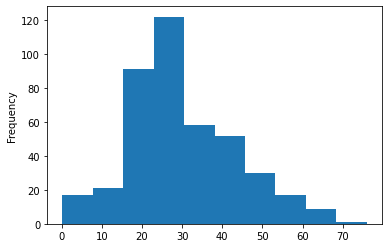

In [26]:
test['age'].plot.hist()

The above bar graph shows most people who travelled were 30 and 20 years old.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


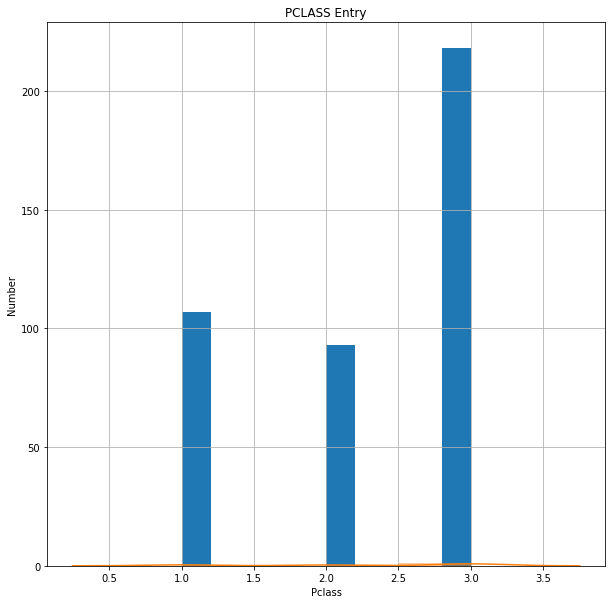

In [27]:
#plotting the histogram for the pclass column
#
plt.figure(figsize = (10,10))
test['pclass'].hist()
sns.distplot(test['pclass'])
plt.title('PCLASS Entry')
plt.xlabel('Pclass')
plt.ylabel('Number')
plt.show()

shows most people on board were on class 3.

#### Bar Graphs

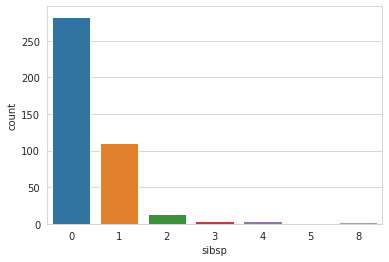

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='sibsp',data=test)

the bar graph shows the number of sibling or spouse the person was accompanied with and most of the people came alone.



### Bivariate Analysis

Label encoding

In [29]:
#this label encoding will be needed for correlation and multivariate analysis
from sklearn.preprocessing import LabelEncoder
#encoding the object columns
columns =['sex','embarked']
#
# we convert the categorical variables 
#
test1= test.apply(LabelEncoder().fit_transform)
#
# Print head
#
test1.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,2,1,68,0,0,24,1
1,2,0,94,1,0,5,2
2,1,1,112,0,0,41,1
3,2,1,52,0,0,34,2
4,2,0,39,1,1,46,2


#### Heat Map

In [30]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = test1.corr()

corr.style.background_gradient(cmap='coolwarm')

,pclass,sex,age,sibsp,parch,fare,embarked
pclass,1.000000,0.108615,-0.399854,-0.008977,0.011067,-0.766406,0.227983
sex,0.108615,1.000000,0.049478,-0.105519,-0.169750,-0.210191,0.076281
age,-0.399854,0.049478,1.000000,-0.071580,0.004089,0.303827,-0.141163
sibsp,-0.008977,-0.105519,-0.071580,1.000000,0.334818,0.343334,0.049236
parch,0.011067,-0.169750,0.004089,0.334818,1.000000,0.336581,0.051827
fare,-0.766406,-0.210191,0.303827,0.343334,0.336581,1.000000,-0.163940
embarked,0.227983,0.076281,-0.141163,0.049236,0.051827,-0.163940,1.000000


age and fare
correlation coefficient = 0.303827, which is greater than 0 indicating a strong relationship between the two variables.

pclass and sex
correlation coefficient = -0.399,which  is a negative correlation which means when one increases the other decreases.


**Train Dataset**

In [31]:
#loading the train dataset
df=pd.read_csv("/content/train (5).csv")
#previewing the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#Getting the shape
#
df.shape

(891, 12)

the train dataset has 891 records and 12 variables

In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


the train dataset has integer ,object and float data types.

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
#Checking for the percentage of the missing values
df.isna().mean().round(4) * 100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

cabin has a high percentage of missing values

In [37]:
#Irrelevant Data
#Drop columns we do not need.
#

df=df.drop(['Cabin',], axis = 1)

In [38]:
# Changing column names to lower case
df.columns= df.columns.str.lower()

In [39]:
#checking for duplicates
df.duplicated().sum()

0

In [40]:
df=df.drop(['passengerid','parch','name','ticket'], axis = 1)
df

,survived,pclass,sex,age,sibsp,fare,embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,1,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [41]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
fare          0
embarked      2
dtype: int64

In [42]:
#interpolate missing values of column age
df['age']=df['age'].interpolate()
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
fare        0
embarked    2
dtype: int64

**Univariate Analysis**

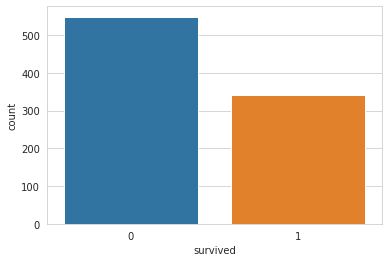

In [43]:
sns.countplot(x='survived',data=df)

the above plot shows most people didnot survive from the titanic incident

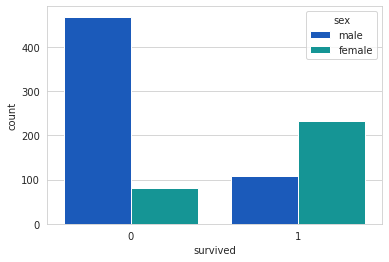

In [44]:
sns.countplot(x='survived',hue='sex',data=df,palette='winter')

It's seen most males died and most women survived 

**Bivariate Analysis**

Label encoding

In [45]:
#this label encoding will be needed for correlation and multivariate analysis
from sklearn.preprocessing import LabelEncoder
#encoding the object columns
columns =['sex','embarked']
#
# we convert the categorical variables 
#
train= df.apply(LabelEncoder().fit_transform)
#
# Print head
#
train.head()

,survived,pclass,sex,age,sibsp,fare,embarked
0,0,2,1,54,1,18,2
1,1,0,0,102,1,207,0
2,1,2,0,65,0,41,2
3,1,0,0,93,1,189,2
4,0,2,1,93,0,43,2


Heat Map

In [46]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = train.corr()

corr.style.background_gradient(cmap='coolwarm')

,survived,pclass,sex,age,sibsp,fare,embarked
survived,1.000000,-0.338481,-0.543351,-0.054309,-0.026385,0.333943,-0.163517
pclass,-0.338481,1.000000,0.131900,-0.297711,0.078141,-0.724119,0.157112
sex,-0.543351,0.131900,1.000000,0.054547,-0.123164,-0.265389,0.104057
age,-0.054309,-0.297711,0.054547,1.000000,-0.230874,0.090656,-0.012327
sibsp,-0.026385,0.078141,-0.123164,-0.230874,1.000000,0.368688,0.063983
fare,0.333943,-0.724119,-0.265389,0.090656,0.368688,1.000000,-0.152946
embarked,-0.163517,0.157112,0.104057,-0.012327,0.063983,-0.152946,1.000000


survived and fare has a correlation coefficient = 0.33943, which is greater than 0 indicating a strong relationship between the two variables.

fare and sibsp has a correlation coefficient =0.368688 ,which means the two variables correlate.

pclass and fare correlation coefficient = -0.724119,which is a strong negative correlation which means when one increases the other decreases

### Multivariate Analysis

#### Linear Discriminant Analysis (LDA)

In [47]:
# Divide the dataset into features and corresponding labels.
X1= train.drop(["survived"],1)
y = train["survived"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [48]:
#checking for unique values of the target variable
y.unique()

array([0, 1])

In [49]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [50]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X1, y)
lda_feat = lda_. transform(X1)

#displaying the coefficients of the reducted columns
lda.coef_

array([[-0.94649339, -3.49556659, -0.01266219, -0.43057095,  0.00411499,
        -0.23960358]])

In [51]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X1.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
fare,0.004115
age,-0.012662
embarked,-0.239604
sibsp,-0.430571
pclass,-0.946493
sex,-3.495567


In [52]:
# using the correlation coefficients o compute the VIF score for each variable we have:
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,survived,pclass,sex,age,sibsp,fare,embarked
survived,1.652469,0.385491,0.813936,0.222705,0.211006,-0.140486,0.092703
pclass,0.385491,3.230251,0.328474,0.478156,-1.067679,2.647903,0.000535
sex,0.813936,0.328474,1.495121,0.046923,0.071692,0.327873,-0.027955
age,0.222705,0.478156,0.046923,1.193594,0.218042,0.091314,-0.028862
sibsp,0.211006,-1.067679,0.071692,0.218042,1.708647,-1.495796,-0.140624
fare,-0.140486,2.647903,0.327873,0.091314,-1.495796,3.621700,0.177647
embarked,0.092703,0.000535,-0.027955,-0.028862,-0.140624,0.177647,1.053795


**K Nearest Neighbors**

In [53]:
X=train.drop('survived',axis=1)
y=train['survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [54]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [57]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[145  15]
 [ 42  66]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       160
           1       0.81      0.61      0.70       108

    accuracy                           0.79       268
   macro avg       0.80      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268



In conclusion we see that we have an accuracy score of 80% ,which means we are successful .

In [58]:
#knn

from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
print(clf)
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics 
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       160
           1       0.65      0.67      0.66       108

    accuracy                           0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268

[[121  39]
 [ 36  72]]
